### Importing Libraries

In [2]:
# import all packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

### Importing Dataset

In [3]:
car = pd.read_csv('CarPricesPrediction.csv')

### Data Exploration

In [7]:
car.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [8]:
car.describe()

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [10]:
car.tail(3)

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90
999,999,Nissan,Silverado,2017,128390,Excellent,18580.60


In [12]:
car

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


In [13]:
car.dtypes

Unnamed: 0      int64
Make           object
Model          object
Year            int64
Mileage         int64
Condition      object
Price         float64
dtype: object

In [15]:
car.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

In [16]:
# Analytical summary of the dataset
car.describe(include = 'all')

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
count,1000.000000,1000,1000,1000.00000,1000.000000,1000,1000.000000
unique,NaN,5,5,NaN,NaN,3,NaN
top,NaN,Chevrolet,Altima,NaN,NaN,Excellent,NaN
freq,NaN,209,226,NaN,NaN,595,NaN
mean,499.500000,NaN,NaN,2015.86500,78796.927000,NaN,22195.205650
std,288.819436,NaN,NaN,3.78247,39842.259941,NaN,4245.191585
min,0.000000,NaN,NaN,2010.00000,10079.000000,NaN,12613.000000
25%,249.750000,NaN,NaN,2013.00000,44942.750000,NaN,18961.862500
50%,499.500000,NaN,NaN,2016.00000,78056.500000,NaN,22247.875000
75%,749.250000,NaN,NaN,2019.00000,112366.250000,NaN,25510.275000


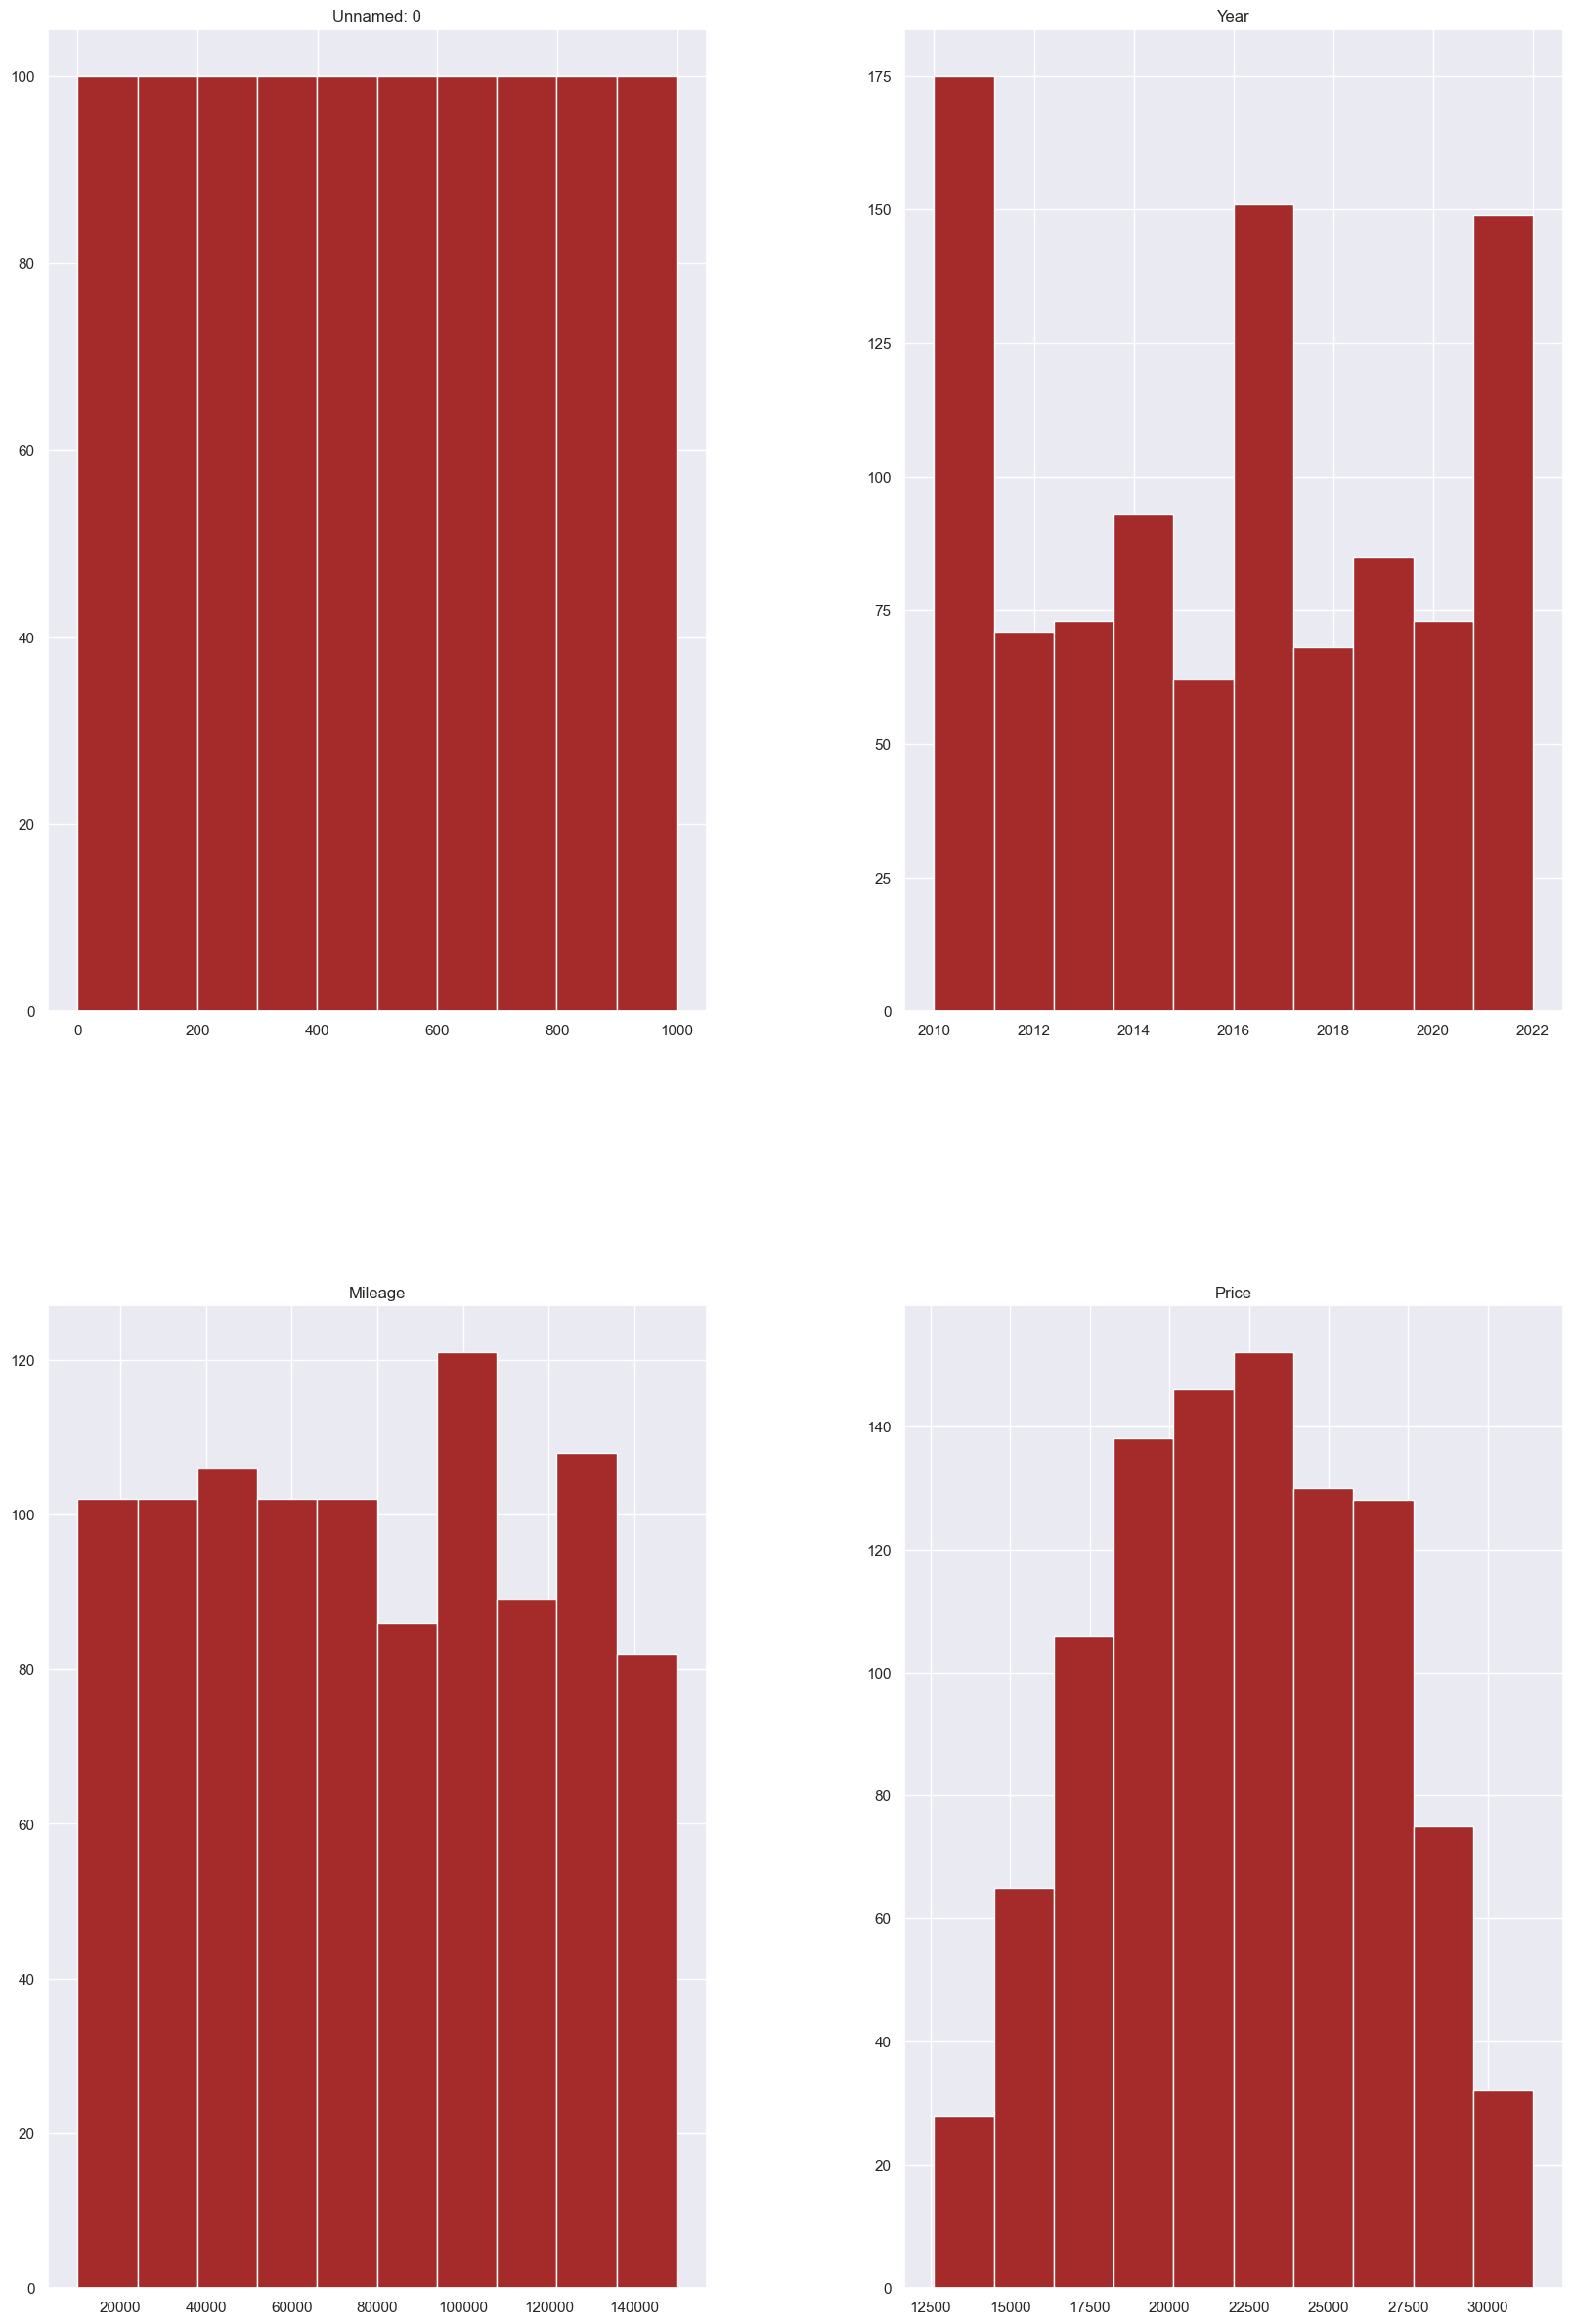

In [38]:
car.hist(figsize = (20,30), color = 'brown');

<Axes: xlabel='Make', ylabel='Price'>

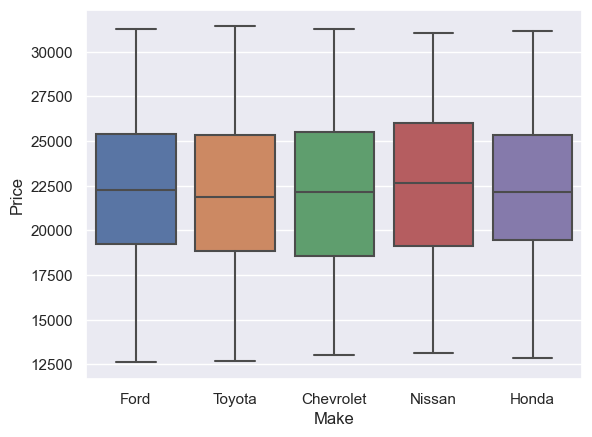

In [21]:
# Relationship between categorical and continous variable
sns.boxplot(x ="Make" , y = "Price", data = car,)

C:\Users\MAC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


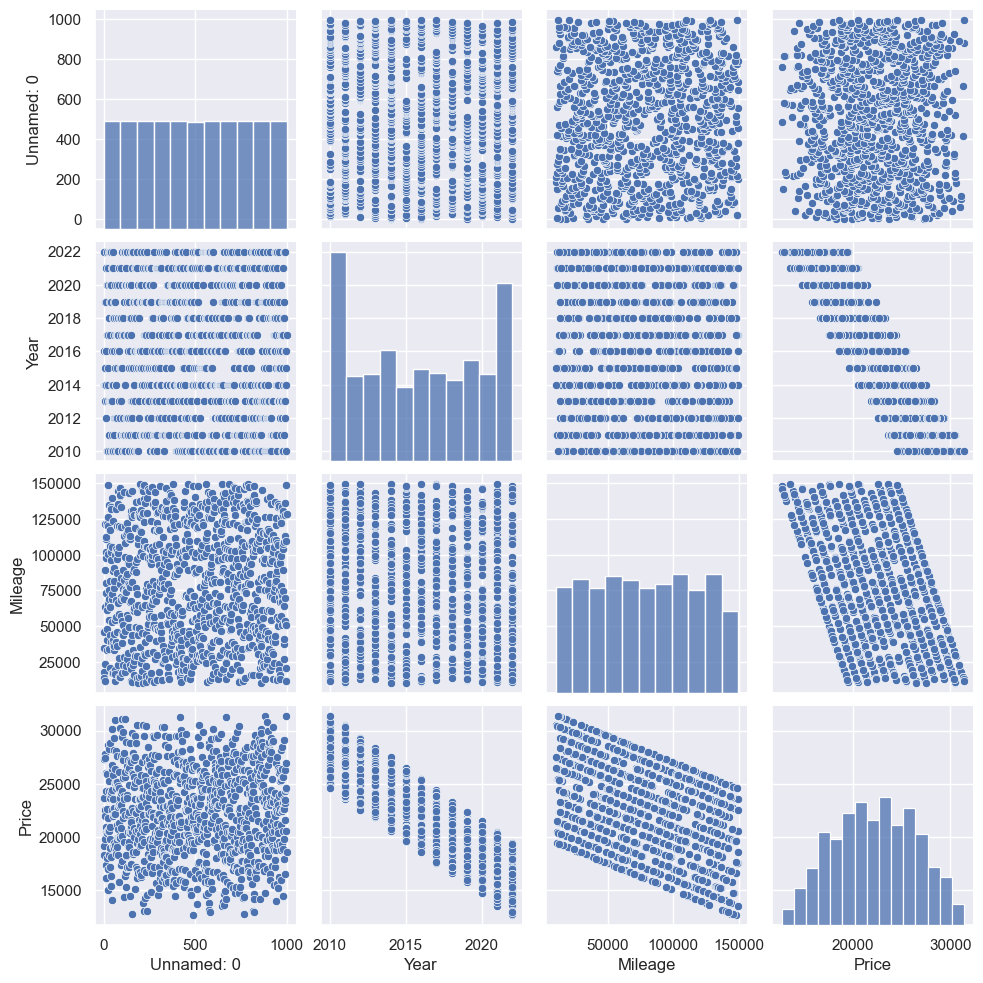

In [42]:
sns.pairplot(car);

### Data Cleaning

In [10]:
# Drop irrelevant columns

car = car.drop(['Unnamed: 0'], axis =1)
car.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [11]:
#Renaming the column names

#car = car.rename(columns = {"Make" : "Make", "Model" : "Model", "Year" : "Year", "Mileage" : "Mileage"})
#car.head(5)

In [6]:
car.shape

(1000, 7)

In [4]:
# Rows containing duplicate data

duplicate_rows_car = car[car.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_car.shape)

Number of duplicate rows:  (0, 7)


In [5]:
# Count the rows 

car.count()

Unnamed: 0    1000
Make          1000
Model         1000
Year          1000
Mileage       1000
Condition     1000
Price         1000
dtype: int64

In [6]:
# Dropping duplicates

car = car.drop_duplicates()
car.count()

Unnamed: 0    1000
Make          1000
Model         1000
Year          1000
Mileage       1000
Condition     1000
Price         1000
dtype: int64

In [7]:
# Finding the null values

print(car.isnull().sum())

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64


In [ ]:
# Dropping the missing values

#car = car.dropna()
#car.count()

### Data Visualization

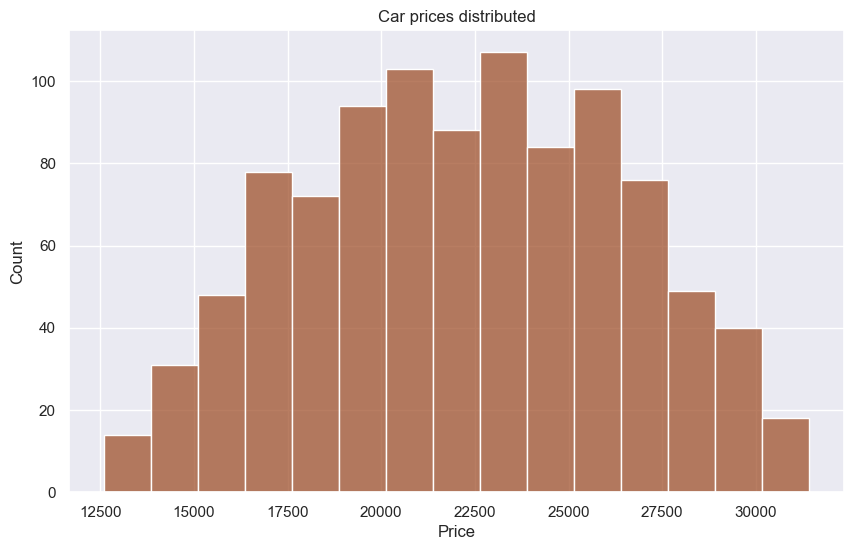

In [9]:
#visualizing the distribution of the car prices

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], color = 'sienna')
plt.title('Car prices distributed')
plt.show()

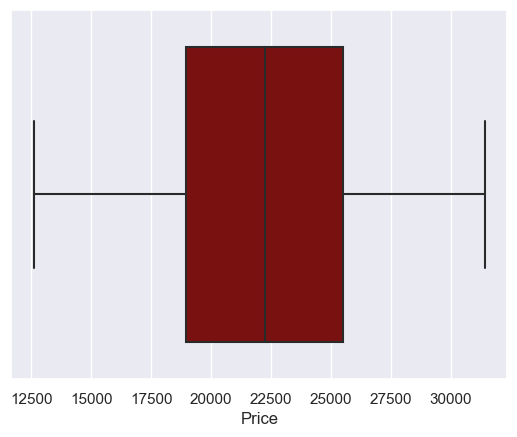

In [43]:
# Finding the outliers

sns.boxplot(x = car['Price'], color = 'darkred');

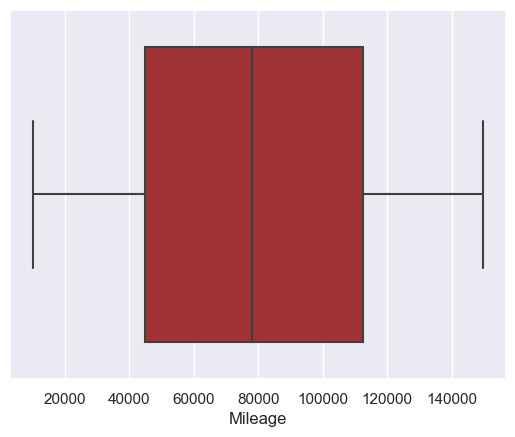

In [44]:
sns.boxplot(x = car['Mileage'], color = 'firebrick');

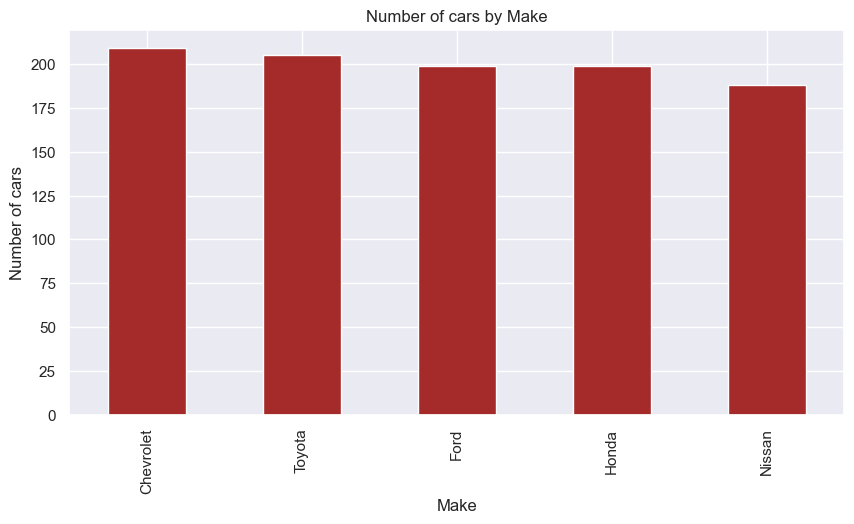

In [5]:
# Plotting a Histogram for number of cars per make

car.Make.value_counts().nlargest(40).plot(kind = 'bar', color = 'brown', figsize = (10,5))
plt.title("Number of cars by Make")
plt.ylabel("Number of cars")
plt.xlabel("Make");
                                            

In [39]:
#converting the categorical variables into numerical 
car = pd.get_dummies(car)

,Unnamed: 0,Year,Mileage,Price,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Excellent,Condition_Fair,Condition_Good
Unnamed: 0,1.000000,-0.030332,0.034805,0.010693,0.028009,-0.016360,0.041435,-0.042566,-0.011812,0.055220,0.019578,-0.002047,-0.000098,-0.076850,0.012628,-0.028968,0.006537
Year,-0.030332,1.000000,-0.016850,-0.883093,0.027463,0.007861,-0.014665,-0.010575,-0.010696,0.039534,-0.057843,0.055234,-0.030884,-0.005426,0.013107,-0.005635,-0.010227
Mileage,0.034805,-0.016850,1.000000,-0.454250,0.009298,-0.054781,0.017111,-0.074725,0.100211,0.020837,0.038209,-0.064556,-0.049996,0.051059,0.002120,-0.018448,0.010556
Price,0.010693,-0.883093,-0.454250,1.000000,-0.028833,0.018703,0.005037,0.044487,-0.037494,-0.045002,0.033608,-0.018919,0.050979,-0.019125,-0.012673,0.013679,0.004158
Make_Chevrolet,0.028009,0.027463,0.009298,-0.028833,1.000000,-0.256209,-0.256209,-0.247335,-0.261023,0.016265,-0.019905,-0.000242,0.042225,-0.038265,-0.021819,-0.028099,0.043122
Make_Ford,-0.016360,0.007861,-0.054781,0.018703,-0.256209,1.000000,-0.248439,-0.239834,-0.253107,-0.041765,0.035617,0.011568,0.010180,-0.014041,0.008138,-0.003853,-0.006104
Make_Honda,0.041435,-0.014665,0.017111,0.005037,-0.256209,-0.248439,1.000000,-0.239834,-0.253107,-0.029788,-0.013408,0.005076,-0.041105,0.081347,-0.002066,0.027793,-0.017121
Make_Nissan,-0.042566,-0.010575,-0.074725,0.044487,-0.247335,-0.239834,-0.239834,1.000000,-0.244340,0.021492,0.000902,-0.021333,-0.002253,-0.000624,-0.004484,-0.010057,0.011844
Make_Toyota,-0.011812,-0.010696,0.100211,-0.037494,-0.261023,-0.253107,-0.253107,-0.244340,1.000000,0.033581,-0.002788,0.004430,-0.009763,-0.027420,0.020310,0.014357,-0.031925
Model_Altima,0.055220,0.039534,0.020837,-0.045002,0.016265,-0.041765,-0.029788,0.021492,0.033581,1.000000,-0.280278,-0.254884,-0.260007,-0.263408,0.031806,-0.049376,0.000042


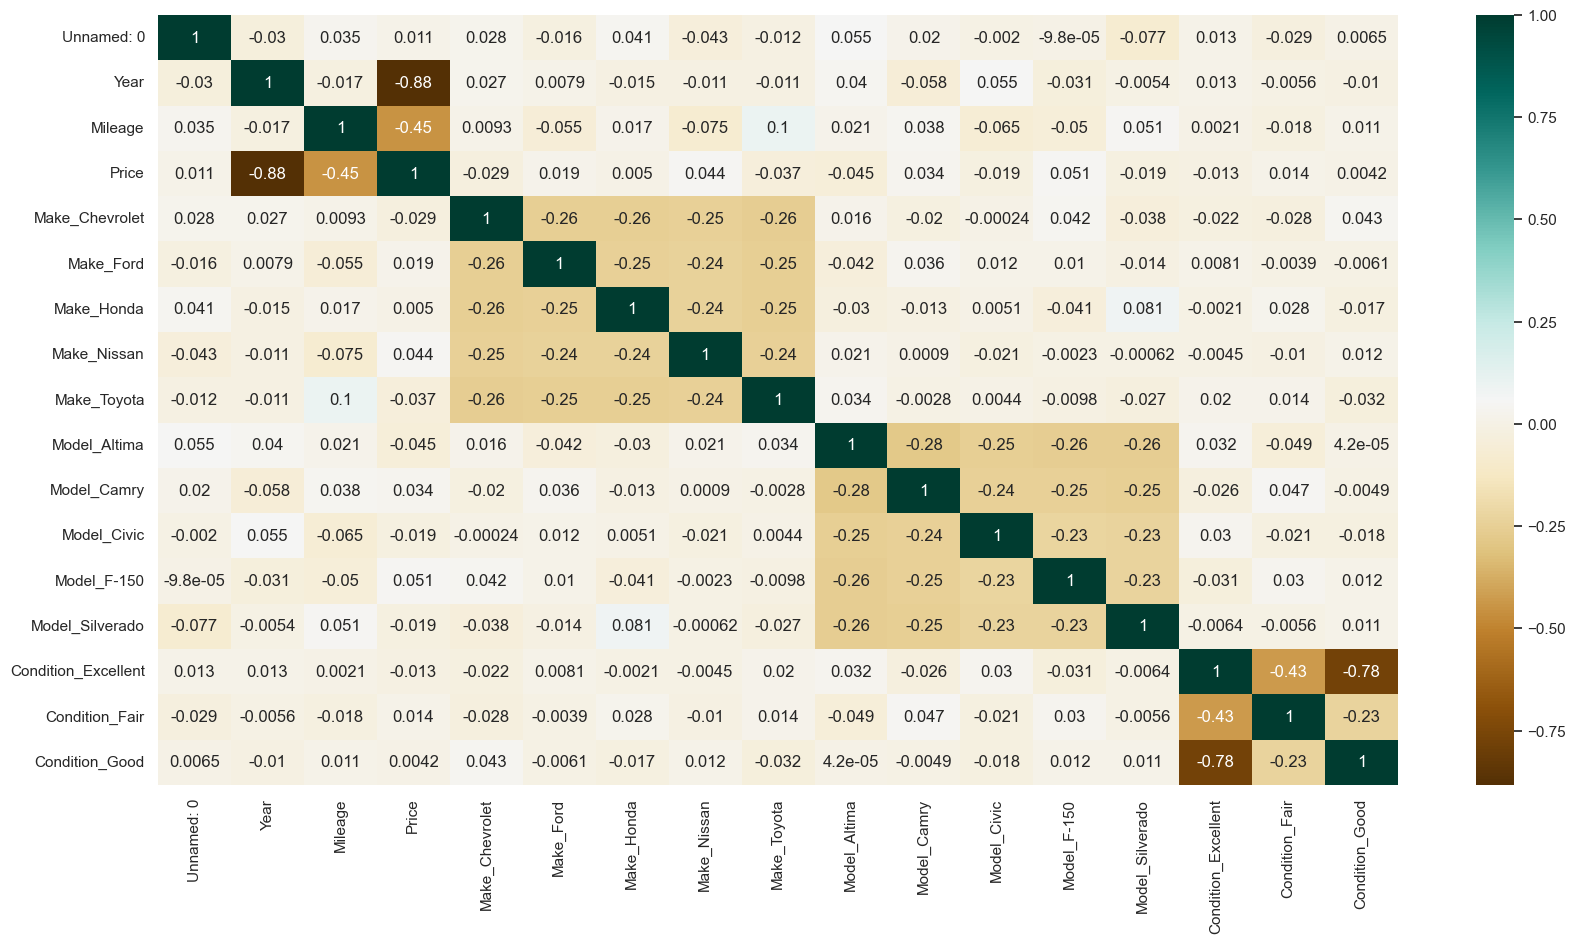

In [40]:
# Finding the relations between the relations

plt.figure(figsize = (20,10))
c = car.corr()
sns.heatmap(c, cmap = 'BrBG', annot = True)
c

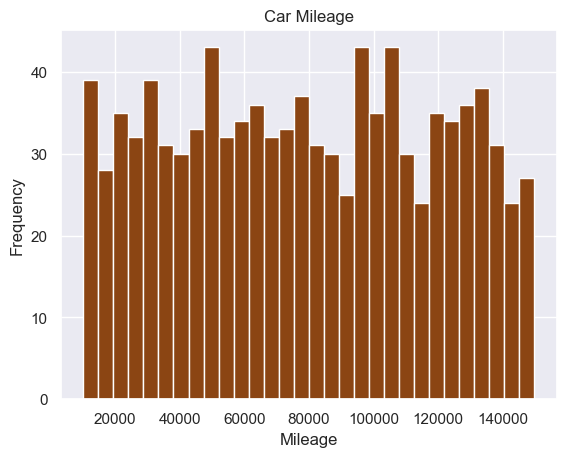

In [50]:
#analyzing the features of the cars mileage

plt.hist(car['Mileage'], bins=30, color = 'saddlebrown')
plt.title('Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

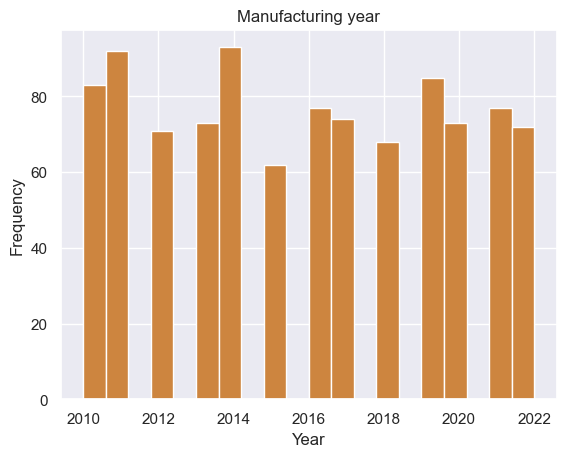

In [33]:
# Analzing the manufacturing years of the cars

plt.hist(car['Year'], bins=20, color = 'peru')
plt.title('Manufacturing year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [55]:
print(car.columns)

Index(['Unnamed: 0', 'Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')


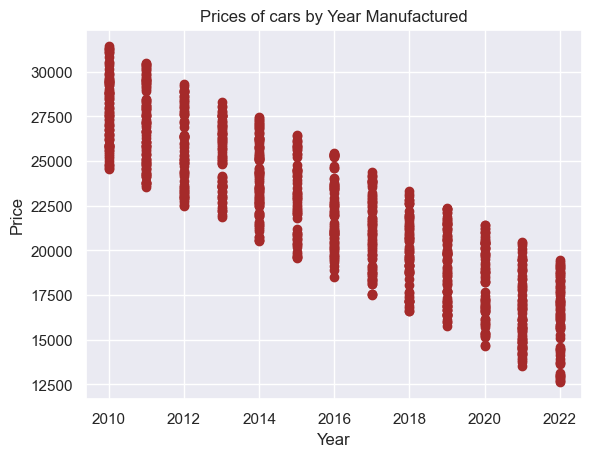

In [9]:
# Analyzing the prices of cars across the years they were manufactured

plt.scatter(data = car, x = 'Year', y = 'Price', color = 'brown')
plt.title('Prices of cars by Year Manufactured')
plt.xlabel('Year')
plt.ylabel('Price');

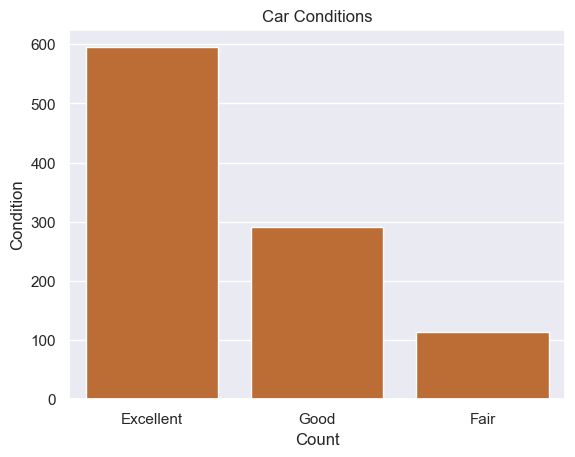

In [36]:
# Analyzing the features of the car conditions

sns.countplot(data = car, x = 'Condition', color = 'chocolate')
plt.title('Car Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show();

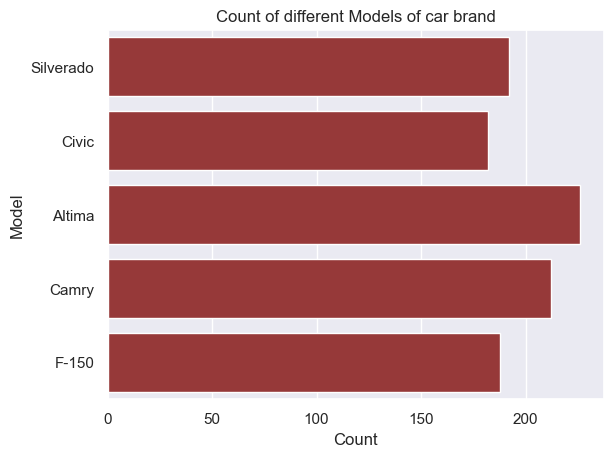

In [18]:
# Analyzing the Models of the car brands

sns.countplot(data = car, y = 'Model', color = 'brown')
plt.title('Count of different Models of car brand')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show();